In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def find_eye_center(img): 

    img_copy = img.copy()
    mean = img_copy.mean()
    stddev = img_copy.std()

    mask = img_copy < (mean - 1 * stddev)
    img_copy[mask] = 0

    ys, xs = np.where(img_copy == 0)

    if len(xs) > 0:
        leftmost_zero = xs.min()
        rightmost_zero = xs.max()

        y_left = ys[xs == leftmost_zero]
        y_right = ys[xs == rightmost_zero]

        top_y = min(y_left.min(), y_right.min())
        bottom_y = max(y_left.max(), y_right.max())
        vertical_mid = (top_y + bottom_y) // 2

        eye_center = ((leftmost_zero + rightmost_zero) // 2, vertical_mid)
        return eye_center
    else: 
        return None


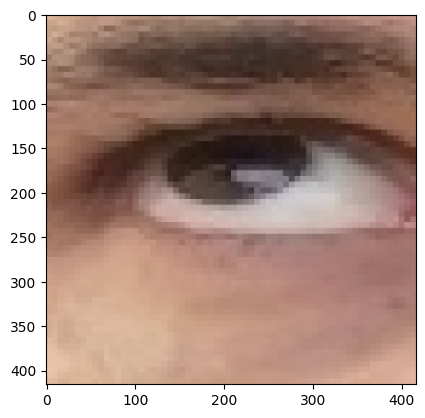

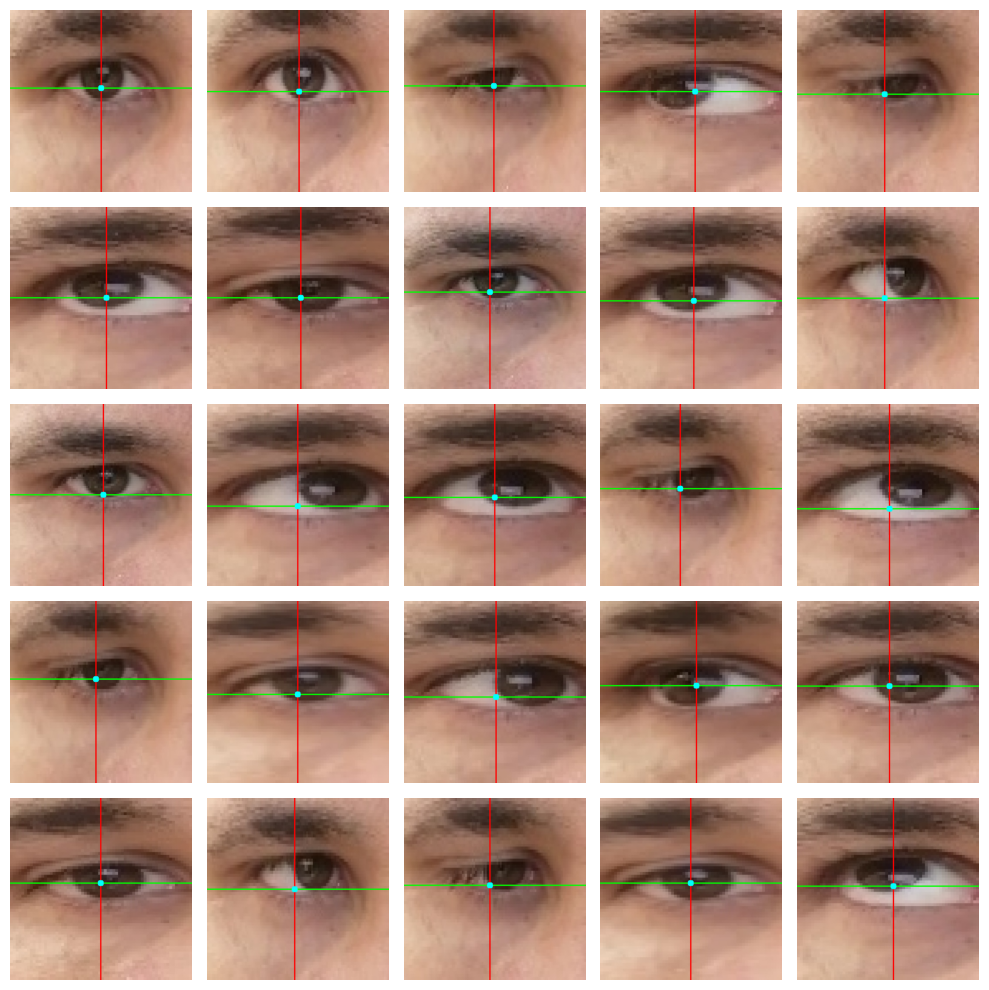

x_centroid: []
y_centroid: []


In [20]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

x_centroid_d2 = []
y_centroid_d2 = []

folder_path = "eye_dataset"
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

images = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images.append(img)


counter = 0 
for img in images:
    counter = counter + 1
    imrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(imrgb)
    gray = cv2.cvtColor(imrgb, cv2.COLOR_RGB2GRAY)
    img_copy = gray.copy()
    mean = img_copy.mean()
    stddev = img_copy.std()

    mask = img_copy < (mean - 1 * stddev)
    img_copy[mask] = 0


    ys, xs = np.where(img_copy == 0)

    if len(xs) > 0:
        leftmost_zero = xs.min()
        rightmost_zero = xs.max()

        y_left = ys[xs == leftmost_zero]
        y_right = ys[xs == rightmost_zero]

        top_y = min(y_left.min(), y_right.min())
        bottom_y = max(y_left.max(), y_right.max())
        vertical_mid = (top_y + bottom_y) // 2

        eye_center = ((leftmost_zero + rightmost_zero) // 2, bottom_y)

        # Horizontal line (through y-coordinate of center)
        line_start_h = (0, eye_center[1])
        line_end_h = (img.shape[1]-1, eye_center[1])
        cv2.line(img, line_start_h, line_end_h, (0, 255, 0), 2)  # green
        cv2.line(img_copy, line_start_h, line_end_h, (0, 255, 0), 2)  # green

        # Vertical line (through x-coordinate of center)
        line_start_v = (eye_center[0], 0)
        line_end_v = (eye_center[0], img.shape[0]-1)
        cv2.line(img, line_start_v, line_end_v, (0, 0, 255), 2)  # red
        cv2.line(img_copy, line_start_v, line_end_v, (0, 0, 255), 2)  # red

        cv2.circle(img_copy, eye_center, 2, (255, 255, 0), 10)


        # plt.imshow(img_copy)

        cv2.circle(img, eye_center, 2, (255, 255, 0), 10)


plt.figure(figsize=(10, 10)) 
for i in range(min(len(images), 25)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(5, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("x_centroid:", x_centroid_d2)
print("y_centroid:", y_centroid_d2)




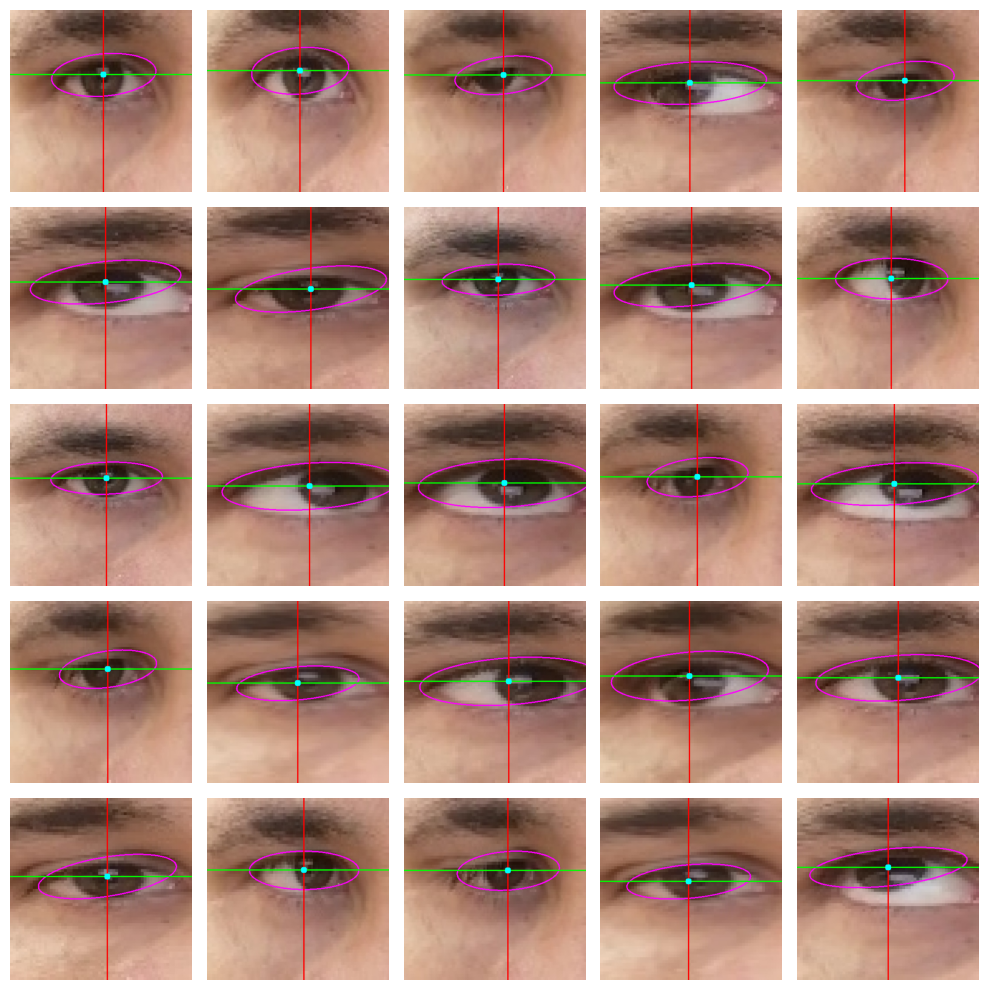

x_centroid: []
y_centroid: []


In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

x_centroid_d2 = []
y_centroid_d2 = []

folder_path = "eye_dataset"
image_files = glob.glob(os.path.join(folder_path, "*.jpg"))

images = []
for file in image_files:
    img = cv2.imread(file)
    if img is not None:
        images.append(img)

for img in images:
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    _, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
    
    # Morphological operations to merge regions (optional)
    kernel = np.ones((3,3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Take the largest contour assuming it’s the eye
        biggest = max(contours, key=cv2.contourArea)
        
        if len(biggest) >= 5:  # fitEllipse needs >=5 points
            ellipse = cv2.fitEllipse(biggest)
            eye_center = (int(ellipse[0][0]), int(ellipse[0][1]))
            
            # Draw ellipse around the eye
            cv2.ellipse(img, ellipse, (255, 0, 255), 2)
            
           # Horizontal line (through y-coordinate of center)
            line_start_h = (0, eye_center[1])
            line_end_h = (img.shape[1]-1, eye_center[1])
            cv2.line(img, line_start_h, line_end_h, (0, 255, 0), 2)  # green

            # Vertical line (through x-coordinate of center)
            line_start_v = (eye_center[0], 0)
            line_end_v = (eye_center[0], img.shape[0]-1)
            cv2.line(img, line_start_v, line_end_v, (0, 0, 255), 2)  # red

            cv2.circle(img, eye_center, 2, (255, 255, 0), 10)


plt.figure(figsize=(10, 10)) 
for i in range(min(len(images), 25)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(5, 5, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("x_centroid:", x_centroid_d2)
print("y_centroid:", y_centroid_d2)

